# Classify different data sets

### Basic includes

In [0]:
# Using pandas to load the csv file
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from keras import models 
from keras import layers 
from keras import callbacks
from keras.utils import to_categorical

# reuters and fashin mnist data set from keras
from keras.datasets import reuters
from keras.datasets import fashion_mnist

# needed to preprocess text
from keras.preprocessing.text import Tokenizer

### Classify the Fashion Mnist

---

(60000, 28, 28)


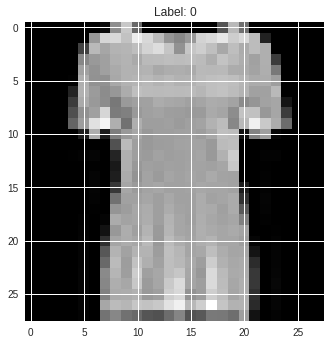

In [222]:
(fashion_train_data, fashion_train_labels), (fashion_test_data, fashion_test_labels) = fashion_mnist.load_data()

print(fashion_train_data.shape)

test_index = 10

plt.title("Label: " + str(fashion_train_labels[test_index]))
plt.imshow(fashion_train_data[test_index], cmap="gray")

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [0]:
# Flatten images
fashion_train_data = fashion_train_data.reshape((60000, 784))
fashion_test_data = fashion_test_data.reshape((10000, 784)) 
fashion_train_data = fashion_train_data.astype('float32') / 255
fashion_test_data = fashion_test_data.astype('float32') / 255

# One Hot Encoding
fashion_train_labels = to_categorical(fashion_train_labels) 
fashion_test_labels = to_categorical(fashion_test_labels)

validation_set_labels = fashion_train_labels[50000:]
validation_set = fashion_train_data[50000:]

training_set_labels = fashion_train_labels[:50000]
training_set = fashion_train_data[:50000]

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [224]:
# Define the neural network

fashion_model = models.Sequential()

fashion_model.add(layers.Dense(512, activation= "selu", input_shape= (784,)))
fashion_model.add(layers.Dropout(0.4))
fashion_model.add(layers.Dense(256, activation="selu"))
fashion_model.add(layers.Dense(128, activation="selu"))
fashion_model.add(layers.Dropout(fashion_dropout))
fashion_model.add(layers.Dense(10, activation="softmax"))

fashion_model.compile(
    loss= "categorical_crossentropy", optimizer= "adamax", metrics= ["accuracy"]
)

fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_62 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_136 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_137 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_63 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_138 (Dense)            (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [225]:
# Train the model
fashion_epochs = 8
f_history = fashion_model.fit(
    fashion_train_data,
    fashion_train_labels,
    
    epochs= fashion_epochs,
    batch_size= 512,
    
    
    validation_data= (validation_set, validation_set_labels)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 9s 153us/step - loss: 0.8205 - acc: 0.7335 - val_loss: 0.5078 - val_acc: 0.8121
Epoch 2/8
60000/60000 [==============================] - 6s 100us/step - loss: 0.5682 - acc: 0.8053 - val_loss: 0.4211 - val_acc: 0.8524
Epoch 3/8
60000/60000 [==============================] - 6s 101us/step - loss: 0.5159 - acc: 0.8196 - val_loss: 0.4083 - val_acc: 0.8563
Epoch 4/8
60000/60000 [==============================] - 6s 101us/step - loss: 0.4877 - acc: 0.8295 - val_loss: 0.3878 - val_acc: 0.8605
Epoch 5/8
60000/60000 [==============================] - 6s 100us/step - loss: 0.4654 - acc: 0.8356 - val_loss: 0.3731 - val_acc: 0.8673
Epoch 6/8
60000/60000 [==============================] - 6s 101us/step - loss: 0.4500 - acc: 0.8410 - val_loss: 0.3641 - val_acc: 0.8663
Epoch 7/8
60000/60000 [==============================] - 6s 101us/step - loss: 0.4328 - acc: 0.8471 - val_loss: 0.3562 - val_acc

In [226]:
fashion_result = fashion_model.evaluate(fashion_test_data, fashion_test_labels)
print('Fashion score: ',fashion_result)

10000/10000 [==============================] - 1s 112us/step
Fashion score:  [0.3917148839235306, 0.8601]


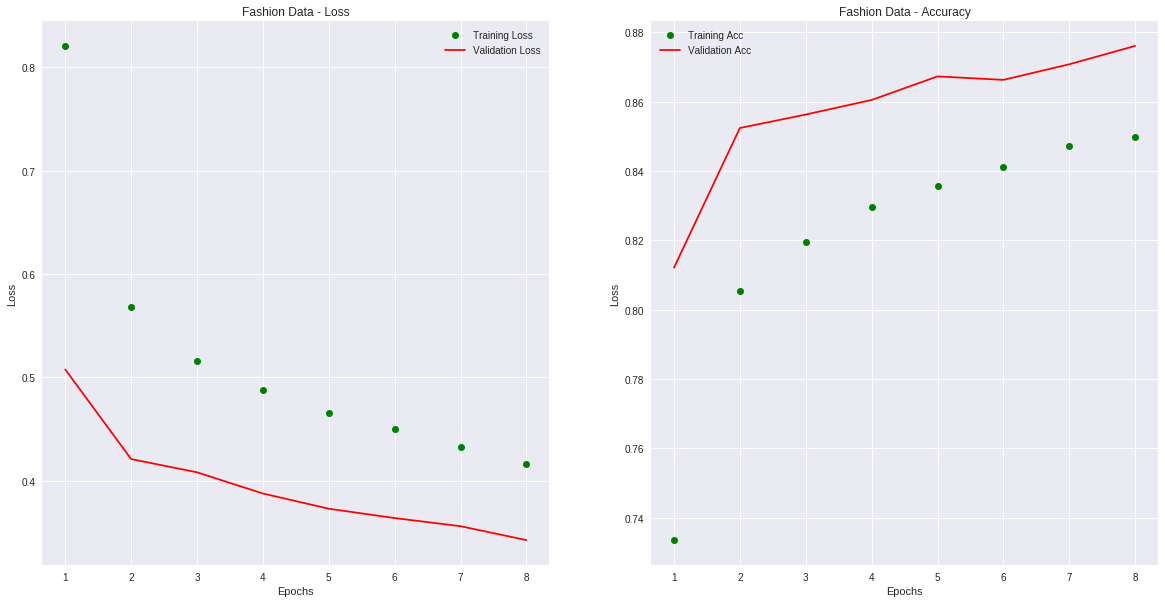

In [227]:
fashion_history = f_history.history
fashion_loss = fashion_history['loss']
fashion_val_loss = fashion_history['val_loss']
fashion_epochs = range(1, len(fashion_loss) + 1)


fashion_acc = fashion_history['acc']
fashion_val_acc = fashion_history['val_acc']


# Plot

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.plot(fashion_epochs, fashion_loss, 'go', label='Training Loss')

ax1.plot(fashion_epochs, fashion_val_loss, 'r', label='Validation Loss')

ax1.set_title('Fashion Data - Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()



ax2.plot(fashion_epochs, fashion_acc, 'go', label='Training Acc')
ax2.plot(fashion_epochs, fashion_val_acc, 'r', label='Validation Acc')

ax2.set_title('Fashion Data - Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

**CONCLUSION**

After 8 Epochs with the test set, got 86% accuracy.


## Classifying newswires

---

Build a network to classify Reuters newswires into 46 different mutually-exclusive topics.

### Load and review the data

In [228]:
(reuters_train_data, reuters_train_labels), (reuters_test_data, reuters_test_labels) = reuters.load_data(num_words=10000)

print(reuters_train_data.shape)
print(reuters_train_labels.shape)
print(reuters_train_data[0])
print(reuters_train_labels[0])

print(set(reuters_train_labels))

(8982,)
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}


Load the word index to decode the train data.

In [229]:
word_index = reuters.get_word_index()

reverse_index = dict([(value+3, key) for (key, value) in word_index.items()])

reverse_index[0] = "<PAD>"
reverse_index[1] = "<START>"
reverse_index[2] = "<UNKNOWN>"  # unknown
reverse_index[3] = "<UNUSED>"

decoded_review = ' '.join([reverse_index.get(i,'?') for i in reuters_train_data[0]])

print(decoded_review)

<START> <UNKNOWN> <UNKNOWN> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [230]:
tokenizer = Tokenizer(num_words= 10000)

reuters_train_data_token = tokenizer.sequences_to_matrix(
    reuters_train_data, mode="binary"
)
reuters_test_data_token = tokenizer.sequences_to_matrix(
    reuters_test_data, mode="binary"
)

reuters_one_hot_train_labels = to_categorical(reuters_train_labels)
reuters_one_hot_test_labels = to_categorical(reuters_test_labels)

reuters_val_data = reuters_train_data_token[:1000]
reuters_val_labels = reuters_one_hot_train_labels[:1000]

reuters_train_data = reuters_train_data_token[1000:]
reuters_train_labels = reuters_one_hot_train_labels[1000:]

print('Train Data Set:')
print(reuters_train_data.shape)
print('Train Labels Set:')
print(reuters_train_labels.shape)

print('Validation Data Set:')
print(reuters_val_data.shape)
print('Validation Labels Set:')
print(reuters_val_labels.shape)

print('Test Data Set')
print(reuters_test_data_token.shape)
print('Test Label Set')
print(reuters_one_hot_test_labels.shape)

Train Data Set:
(7982, 10000)
Train Labels Set:
(7982, 46)
Validation Data Set:
(1000, 10000)
Validation Labels Set:
(1000, 46)
Test Data Set
(2246, 10000)
Test Label Set
(2246, 46)


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [231]:
reuters_model = models.Sequential()

reuters_model.add(layers.Dense(512, activation="tanh", input_dim=10000))
reuters_model.add(layers.Dropout(0.4))
reuters_model.add(layers.Dense(256, activation="selu"))
reuters_model.add(layers.Dense(128, activation="selu"))
reuters_model.add(layers.Dropout(reuters_dropout))
reuters_model.add(layers.Dense(46, activation="softmax"))

reuters_model.compile(
    loss= "categorical_crossentropy", 
    optimizer= "adamax", 
    metrics= ["accuracy"]
)

reuters_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 512)               5120512   
_________________________________________________________________
dropout_64 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_140 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_141 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_65 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_142 (Dense)            (None, 46)                5934      
Total params: 5,290,670
Trainable params: 5,290,670
Non-trainable params: 0
_________________________________________________________________


In [232]:
reuters_model_history = reuters_model.fit(
    reuters_train_data,
    reuters_train_labels,
    batch_size = 512,
    epochs = 8,
    verbose = 2,
    validation_data = (reuters_val_data, reuters_val_labels)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
 - 9s - loss: 1.7675 - acc: 0.6119 - val_loss: 1.0592 - val_acc: 0.7700
Epoch 2/8
 - 5s - loss: 0.8155 - acc: 0.8216 - val_loss: 0.8457 - val_acc: 0.8320
Epoch 3/8
 - 5s - loss: 0.5253 - acc: 0.8882 - val_loss: 0.7909 - val_acc: 0.8360
Epoch 4/8
 - 5s - loss: 0.3677 - acc: 0.9207 - val_loss: 0.8114 - val_acc: 0.8340
Epoch 5/8
 - 5s - loss: 0.2816 - acc: 0.9356 - val_loss: 0.8462 - val_acc: 0.8290
Epoch 6/8
 - 5s - loss: 0.2249 - acc: 0.9463 - val_loss: 0.8832 - val_acc: 0.8260
Epoch 7/8
 - 5s - loss: 0.1920 - acc: 0.9539 - val_loss: 0.8983 - val_acc: 0.8230
Epoch 8/8
 - 5s - loss: 0.1638 - acc: 0.9559 - val_loss: 0.9241 - val_acc: 0.8320


In [233]:
reuters_result = reuters_model.evaluate(
    reuters_test_data_token, 
    reuters_one_hot_test_labels
)

print('Reuters score: ',reuters_result)

2246/2246 [==============================] - 1s 465us/step
Reuters score:  [1.0197648825861998, 0.8045414069456812]


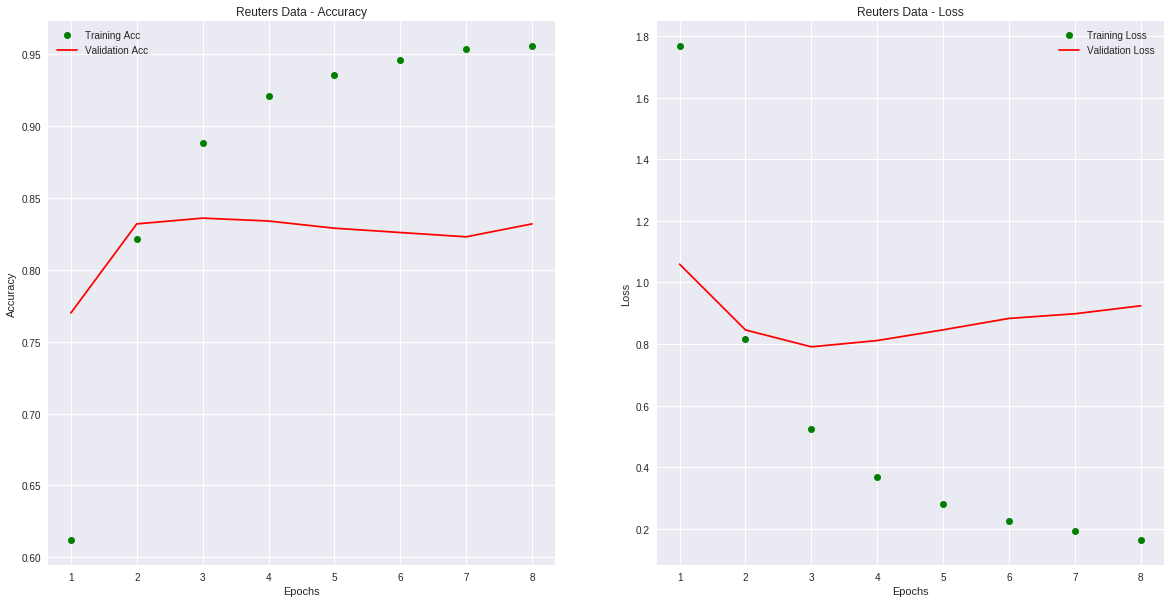

In [234]:
reuters_history = reuters_model_history.history
reuters_loss = reuters_history['loss']
reuters_val_loss = reuters_history['val_loss']
reuters_epochs = range(1, len(reuters_loss) + 1)

reuters_acc = reuters_history['acc']
reuters_val_acc = reuters_history['val_acc']



# Plot

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.plot(reuters_epochs, reuters_acc, 'go', label='Training Acc')
ax1.plot(reuters_epochs, reuters_val_acc, 'r', label='Validation Acc')

ax1.set_title('Reuters Data - Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()



ax2.plot(reuters_epochs, reuters_loss, 'go', label='Training Loss')
ax2.plot(reuters_epochs, reuters_val_loss, 'r', label='Validation Loss')

ax2.set_title('Reuters Data - Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

**CONCLUSION**

After 8 Epochs with the test set, got 80% accuracy.

## Predicting Student Admissions

---

Predict student admissions based on three pieces of data:

- GRE Scores
- GPA Scores
- Class rank

### Load and visualize the data

In [235]:
student_data = pd.read_csv("student_data.csv")
print(student_data)

     admit    gre   gpa  rank
0        0  380.0  3.61   3.0
1        1  660.0  3.67   3.0
2        1  800.0  4.00   1.0
3        1  640.0  3.19   4.0
4        0  520.0  2.93   4.0
5        1  760.0  3.00   2.0
6        1  560.0  2.98   1.0
7        0  400.0  3.08   2.0
8        1  540.0  3.39   3.0
9        0  700.0  3.92   2.0
10       0  800.0  4.00   4.0
11       0  440.0  3.22   1.0
12       1  760.0  4.00   1.0
13       0  700.0  3.08   2.0
14       1  700.0  4.00   1.0
15       0  480.0  3.44   3.0
16       0  780.0  3.87   4.0
17       0  360.0  2.56   3.0
18       0  800.0  3.75   2.0
19       1  540.0  3.81   1.0
20       0  500.0  3.17   3.0
21       1  660.0  3.63   2.0
22       0  600.0  2.82   4.0
23       0  680.0  3.19   4.0
24       1  760.0  3.35   2.0
25       1  800.0  3.66   1.0
26       1  620.0  3.61   1.0
27       1  520.0  3.74   4.0
28       1  780.0  3.22   2.0
29       0  520.0  3.29   1.0
..     ...    ...   ...   ...
370      1  540.0  3.77   2.0
371      1

Plot of the GRE and the GPA from the data.

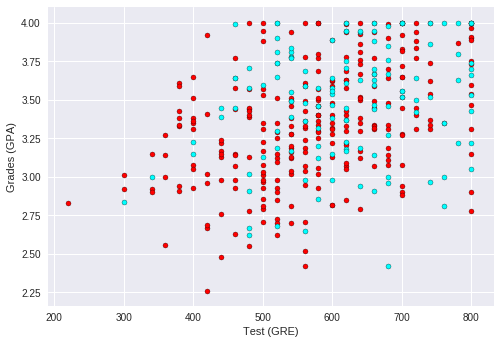

In [236]:
X = np.array(student_data[["gre","gpa"]])
y = np.array(student_data["admit"])
admitted = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]
plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
plt.xlabel('Test (GRE)')
plt.ylabel('Grades (GPA)')

plt.show()

Plot of the data by class rank.

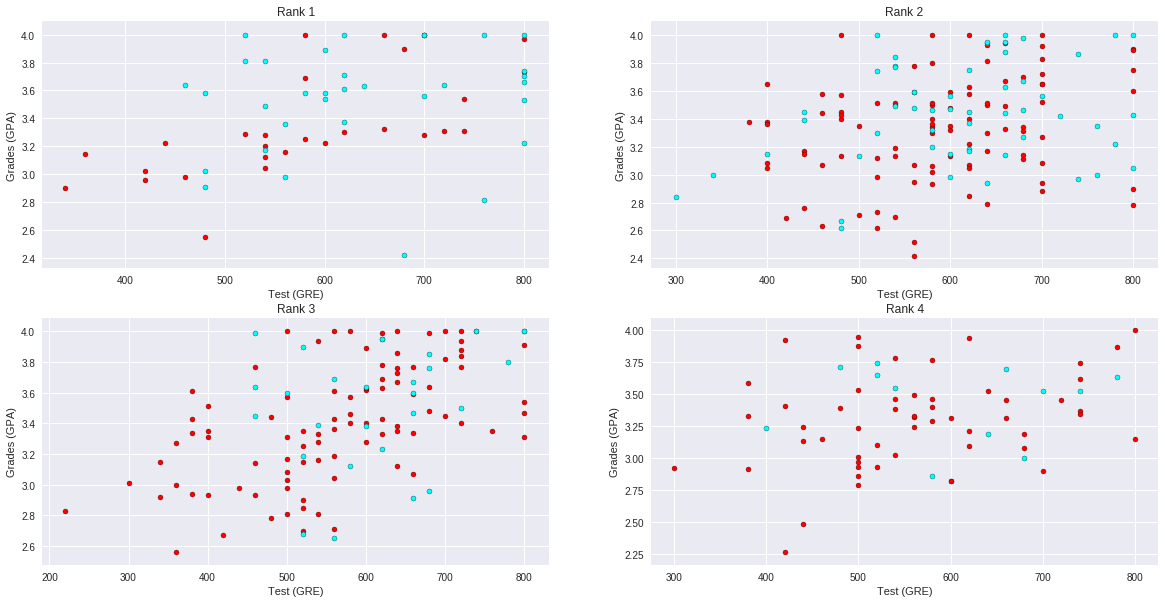

In [237]:
f, plots = plt.subplots(2, 2, figsize=(20,10))
plots = [plot for sublist in plots for plot in sublist]

for idx, plot in enumerate(plots):
    data_rank = student_data[student_data["rank"]==idx+1]
    plot.set_title("Rank " + str(idx+1))
    X = np.array(data_rank[["gre","gpa"]])
    y = np.array(data_rank["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plot.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plot.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plot.set_xlabel('Test (GRE)')
    plot.set_ylabel('Grades (GPA)')
    

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [243]:
# Normalize


student_data.fillna(value= 0, inplace= True)
# Shuffle data
student_data = student_data.sample(frac= 1).reset_index(drop= True)

# x
gre, gpa = np.array(student_data['gre']), np.array(student_data['gpa'])
# y
admit, rank = np.array(student_data['admit']), np.array(student_data['rank'])

# Normal Distribution
gpa = (gpa - gpa.mean(axis= 0)) / gpa.std(axis= 0)
gre = (gre - gre.mean(axis= 0)) / gre.std(axis= 0)

normalized_student_data = np.zeros((len(gpa), 2))
normalized_student_data[:,0], normalized_student_data[:,1] = gpa, gre

print(normalized_student_data.shape)

# one hot encoding
rank_one_hot = to_categorical(rank)

student_train_data = normalized_student_data[:300]
student_train_labels = rank_one_hot[:300]

student_test_data = normalized_student_data[300:350]
student_test_labels = rank_one_hot[300:350]

student_val_data = normalized_student_data[350:]
student_val_labels = rank_one_hot[350:]

(400, 2)


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [244]:
student_model = models.Sequential()

student_model.add(layers.Dense(64, activation= 'sigmoid', input_shape=(2,)))

student_model.add(layers.Dropout(0.4))

student_model.add(layers.Dense(8, activation= 'sigmoid'))
student_model.add(layers.Dense(5,  activation= 'sigmoid'))

student_model.compile(
    optimizer= "rmsprop", 
    loss= "binary_crossentropy", 
    metrics=["accuracy"]
)

student_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_146 (Dense)            (None, 64)                192       
_________________________________________________________________
dropout_67 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_147 (Dense)            (None, 8)                 520       
_________________________________________________________________
dense_148 (Dense)            (None, 5)                 45        
Total params: 757
Trainable params: 757
Non-trainable params: 0
_________________________________________________________________


In [245]:
student_model_history = student_model.fit(
  student_train_data,
  student_train_labels,
  epochs= 8,
  batch_size= 128,
  validation_data= (student_val_data, student_val_labels),
  verbose= 2
)

Train on 300 samples, validate on 50 samples
Epoch 1/8
 - 4s - loss: 0.5807 - acc: 0.6447 - val_loss: 0.5562 - val_acc: 0.7040
Epoch 2/8
 - 0s - loss: 0.5610 - acc: 0.6993 - val_loss: 0.5418 - val_acc: 0.8000
Epoch 3/8
 - 0s - loss: 0.5479 - acc: 0.7340 - val_loss: 0.5307 - val_acc: 0.8000
Epoch 4/8
 - 0s - loss: 0.5372 - acc: 0.7733 - val_loss: 0.5217 - val_acc: 0.8000
Epoch 5/8
 - 0s - loss: 0.5309 - acc: 0.7873 - val_loss: 0.5139 - val_acc: 0.8000
Epoch 6/8
 - 0s - loss: 0.5221 - acc: 0.7907 - val_loss: 0.5072 - val_acc: 0.8000
Epoch 7/8
 - 0s - loss: 0.5136 - acc: 0.7947 - val_loss: 0.5012 - val_acc: 0.8000
Epoch 8/8
 - 0s - loss: 0.5066 - acc: 0.7967 - val_loss: 0.4959 - val_acc: 0.8000


In [246]:
student_result = student_model.evaluate(
  student_test_data,
  student_test_labels
)

print('Student score:',student_result)

50/50 [==============================] - 0s 380us/step
Student score: [0.504570665359497, 0.800000011920929]


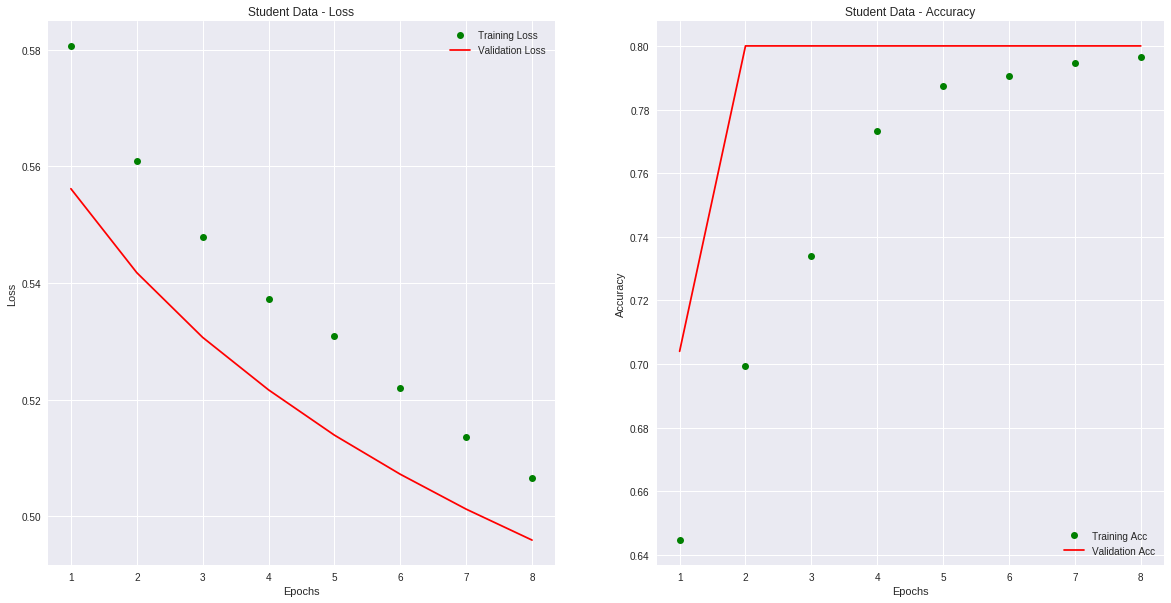

In [247]:
student_history = student_model_history.history

student_val_loss = student_history['val_loss']
student_loss = student_history['loss']
student_epochs = range(1, len(student_loss) + 1)

student_val_acc = student_history['val_acc']
student_acc = student_history['acc']



# Plot

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.plot(student_epochs, student_loss, 'go', label= "Training Loss")
ax1.plot(student_epochs, student_val_loss, 'r', label= "Validation Loss")
ax1.set_title("Student Data - Loss")
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epochs")
ax1.legend()


ax2.plot(student_epochs, student_acc, 'go', label= "Training Acc")
ax2.plot(student_epochs, student_val_acc, 'r', label= "Validation Acc")
ax2.set_title("Student Data - Accuracy")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epochs")
ax2.legend()

plt.show()

**CONCLUSION**

After 8 Epochs with the test set, got 80% accuracy.